# Step 1:

Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [55]:
import pandas as pd
import numpy as np

#Standardizing values 
df = pd.read_csv('Titanic.csv')
df = df[['pclass', 'sex', 'age','sibsp','survived']] 
df['pclass'] = df['pclass'].map({'1st':1,'2nd':2,'3rd':3})
df['sex'] = df['sex'].map({'male':0,'female':1})
df['age'].fillna((df['age'].mean()),inplace=True)
df = df.dropna()
df.head()

,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


In [56]:
#Data Split
X = df.drop('survived',axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2:

Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to this one (the actual structure and size of your tree can be different)

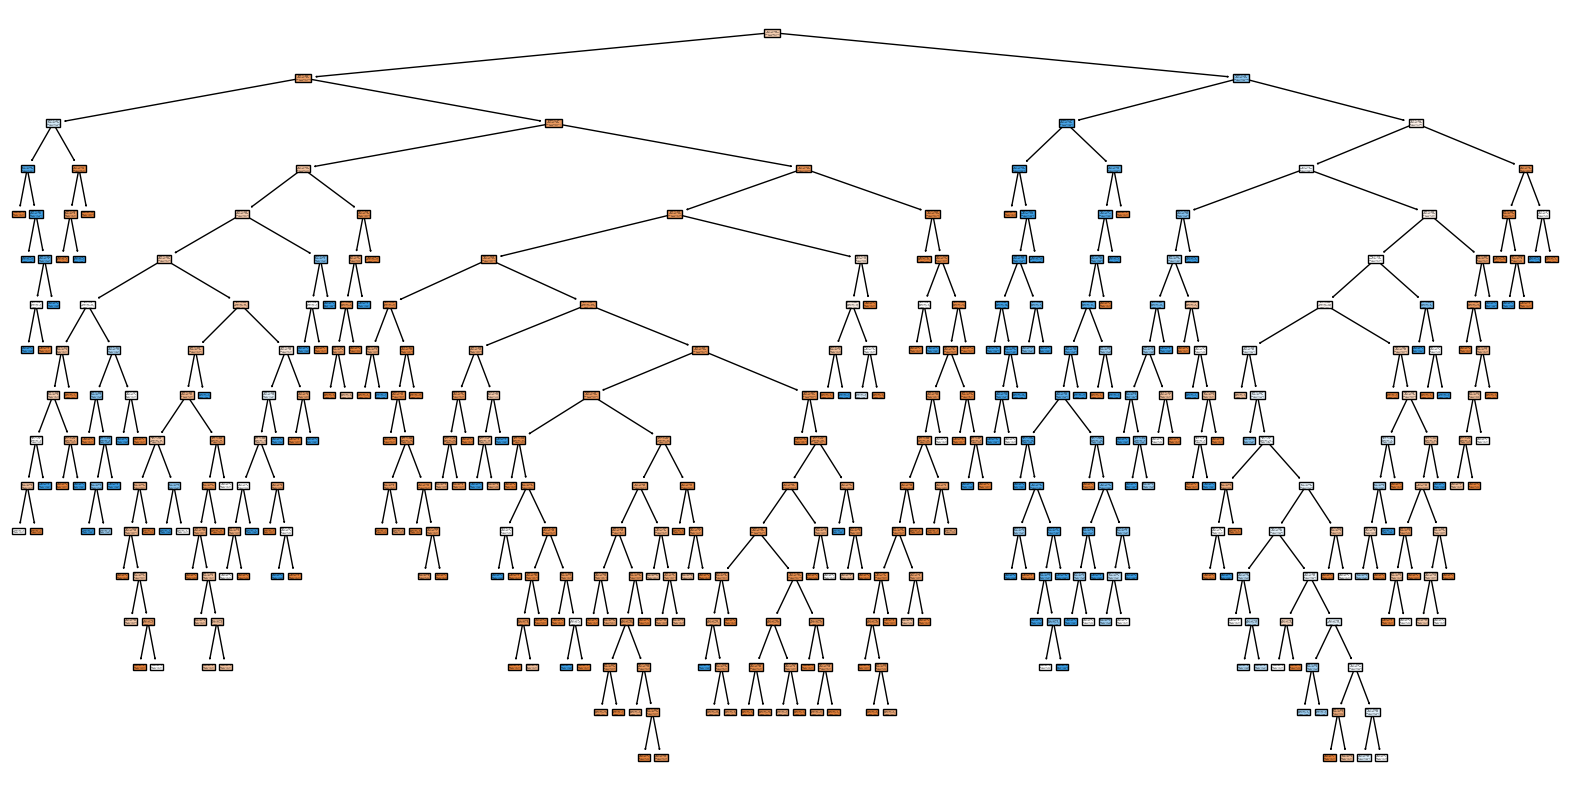

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Plot the full tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

# Step 3:

Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.

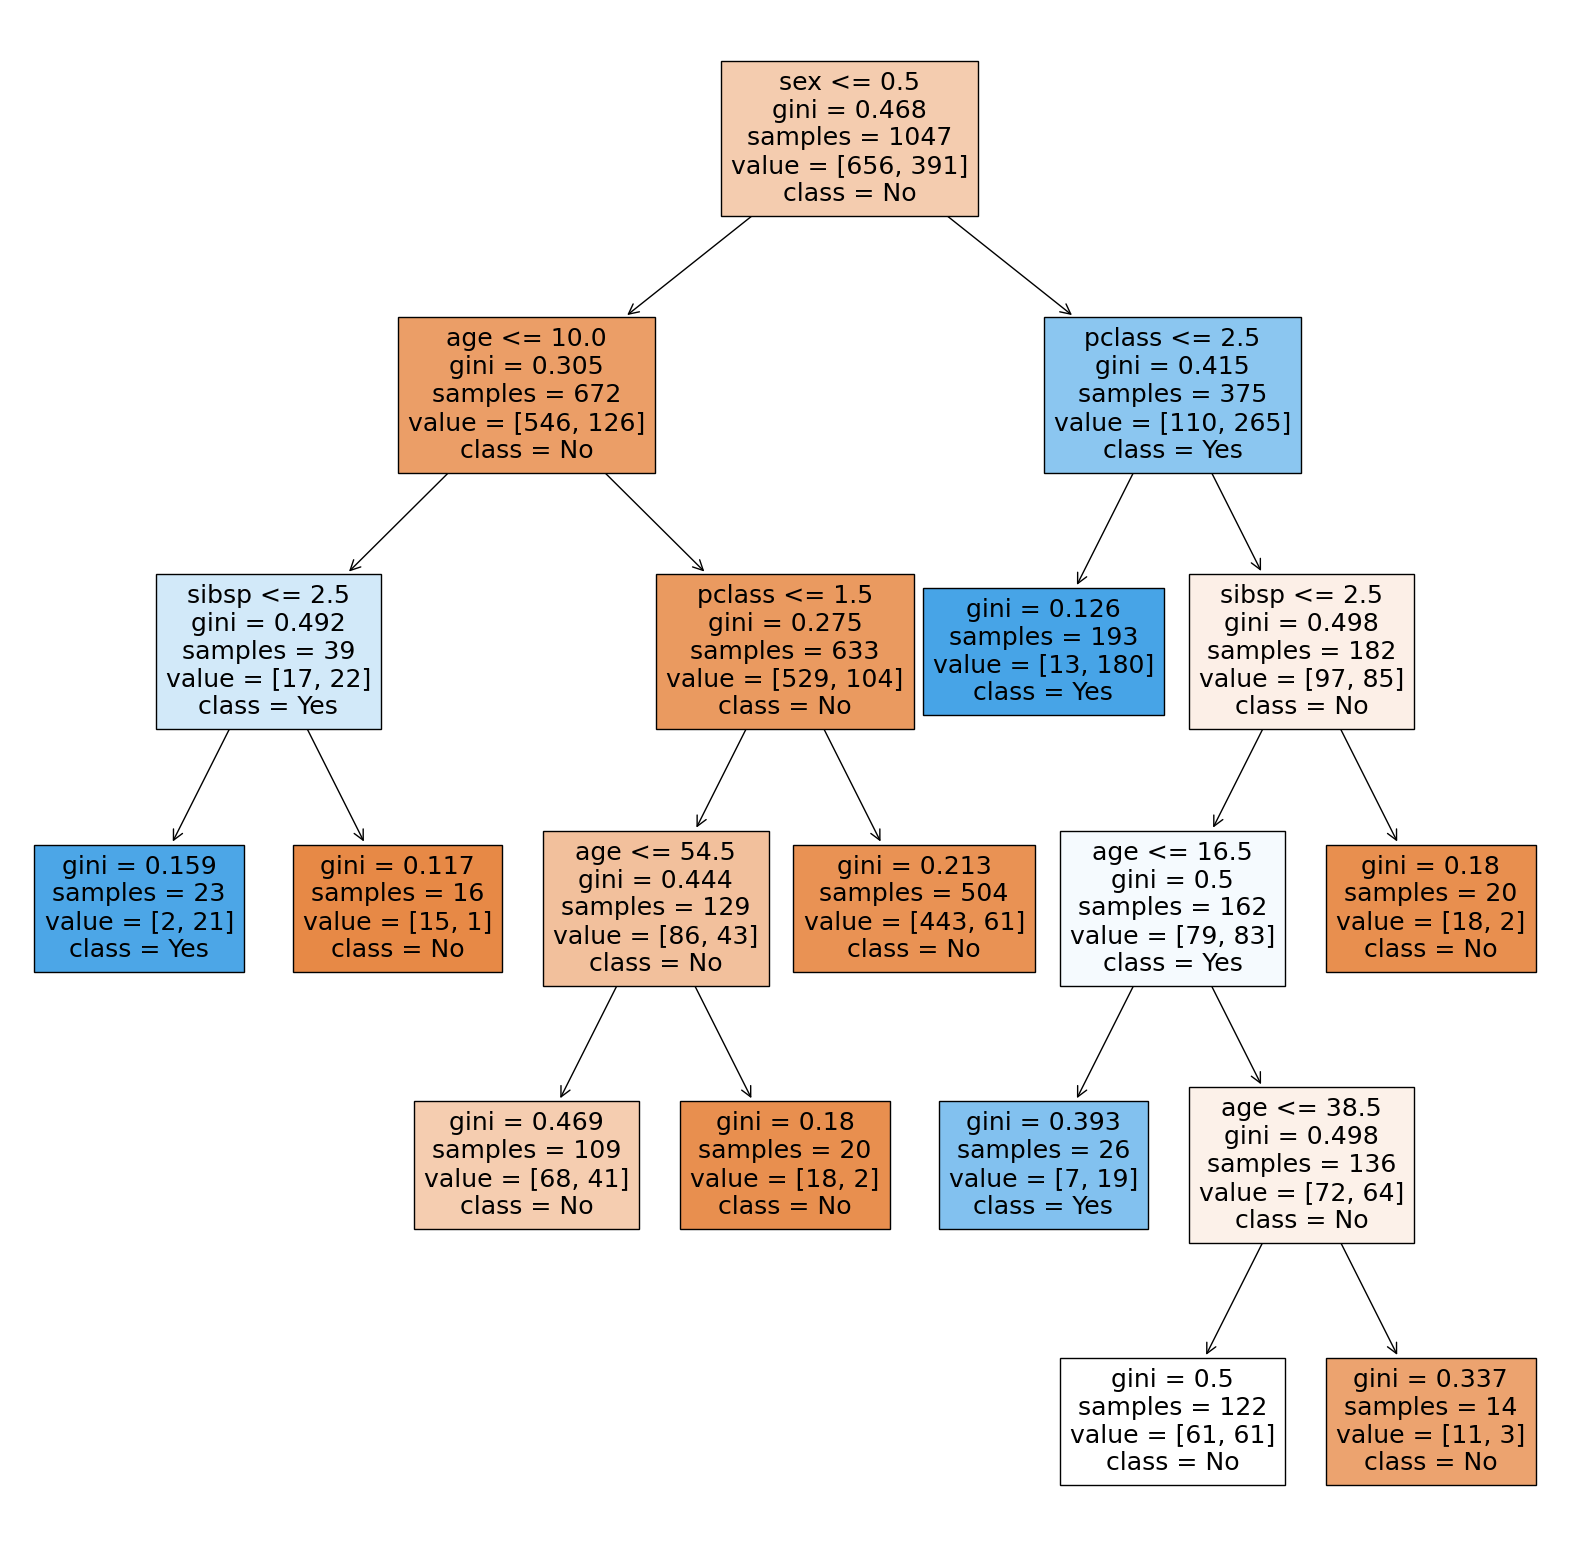

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_leaf_nodes': [2, 4, 6, 8, 10]}

# Perform grid search to find the best parameter
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']

# Prune the tree with the best parameter
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes)
pruned_tree.fit(X_train, y_train)

# Plot the pruned tree
plt.figure(figsize=(20, 20))
plot_tree(pruned_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


# Step 4

For the pruned tree, report its accuracy on the test set for the following: percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

In [53]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred_pruned = pruned_tree.predict(X_test)

# Calculate accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
percent_survivors_correct = accuracy_pruned * 100

# Calculate percent fatalities correctly predicted
percent_fatalities_correct = 100 - percent_survivors_correct

print(f"Percent survivors correctly predicted: {percent_survivors_correct:.2f}%")
print(f"Percent fatalities correctly predicted: {percent_fatalities_correct:.2f}%")



Percent survivors correctly predicted: 78.24%
Percent fatalities correctly predicted: 21.76%


# Step 5:

Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following:
percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set)
Check whether there is improvement as compared to a single tree obtained in Step 4.

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest with the best parameter from Step 3
forest = RandomForestClassifier(n_estimators=50, max_leaf_nodes=best_max_leaf_nodes)
forest.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_forest = forest.predict(X_test)

# Calculate accuracy
accuracy_forest = accuracy_score(y_test, y_pred_forest)
percent_survivors_correct_forest = accuracy_forest * 100

# Calculate percent fatalities correctly predicted
percent_fatalities_correct_forest = 100 - percent_survivors_correct_forest

print(f"Percent survivors correctly predicted by random forest: {percent_survivors_correct_forest:.2f}%")
print(f"Percent fatalities correctly predicted by random forest: {percent_fatalities_correct_forest:.2f}%")


Percent survivors correctly predicted by random forest: 80.92%
Percent fatalities correctly predicted by random forest: 19.08%


There does not seems to be a big improvement compared to the single tree in step 4. The percent of surviviors correctly predicted by random forest went down about 2%, while the percent of fatalities correctly predicted by random forest went up about 2%.